# Taller 1 - Metodos Computacionales

**Andres Felipe Olarte Acero**

**Nicolas Barrentes Cano**

In [112]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import cmath as cm
import scipy.signal as sig

**Punto 1**
Implementado la Transformada Discreta de Fourier

In [113]:
#fourier discreta
def fourierDiscreta(ts,ys,f):
    F=0
    for i in range(len(ys)):
        F+= ys[i]*np.exp(-2*np.pi*complex(0,1)*ts[i]*f)
    return(F)

**Punto 2**

implementacion de la señal de prueba con $t_0=0$ y $t_{max}=5$ y Muestras $N=100$

<ipython-input-114-538ac2fd3922>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t,f(t),'.-r',color='black',lw=1,label='Model')


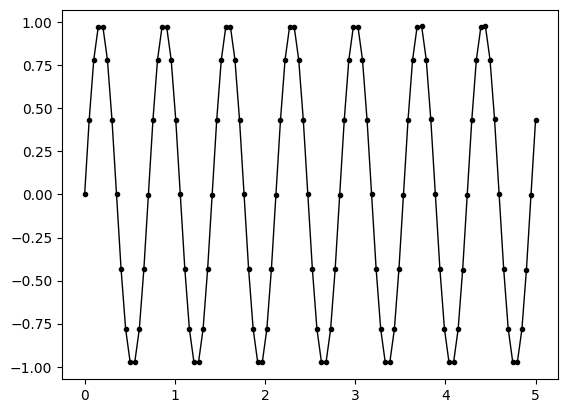

In [114]:
t=np.linspace(0,5,100)

#Señal de prueba
def f(x):
    return(np.sin(2*np.pi*(2**(1/2))*x))


#gráfica señal de prueba
plt.plot(t,f(t),'.-r',color='black',lw=1,label='Model')


Nyquist de la muestra realizada

In [115]:
nys= 1/(t[1]-t[0])

Graficando la tranformada de Fourier a todo el espectro

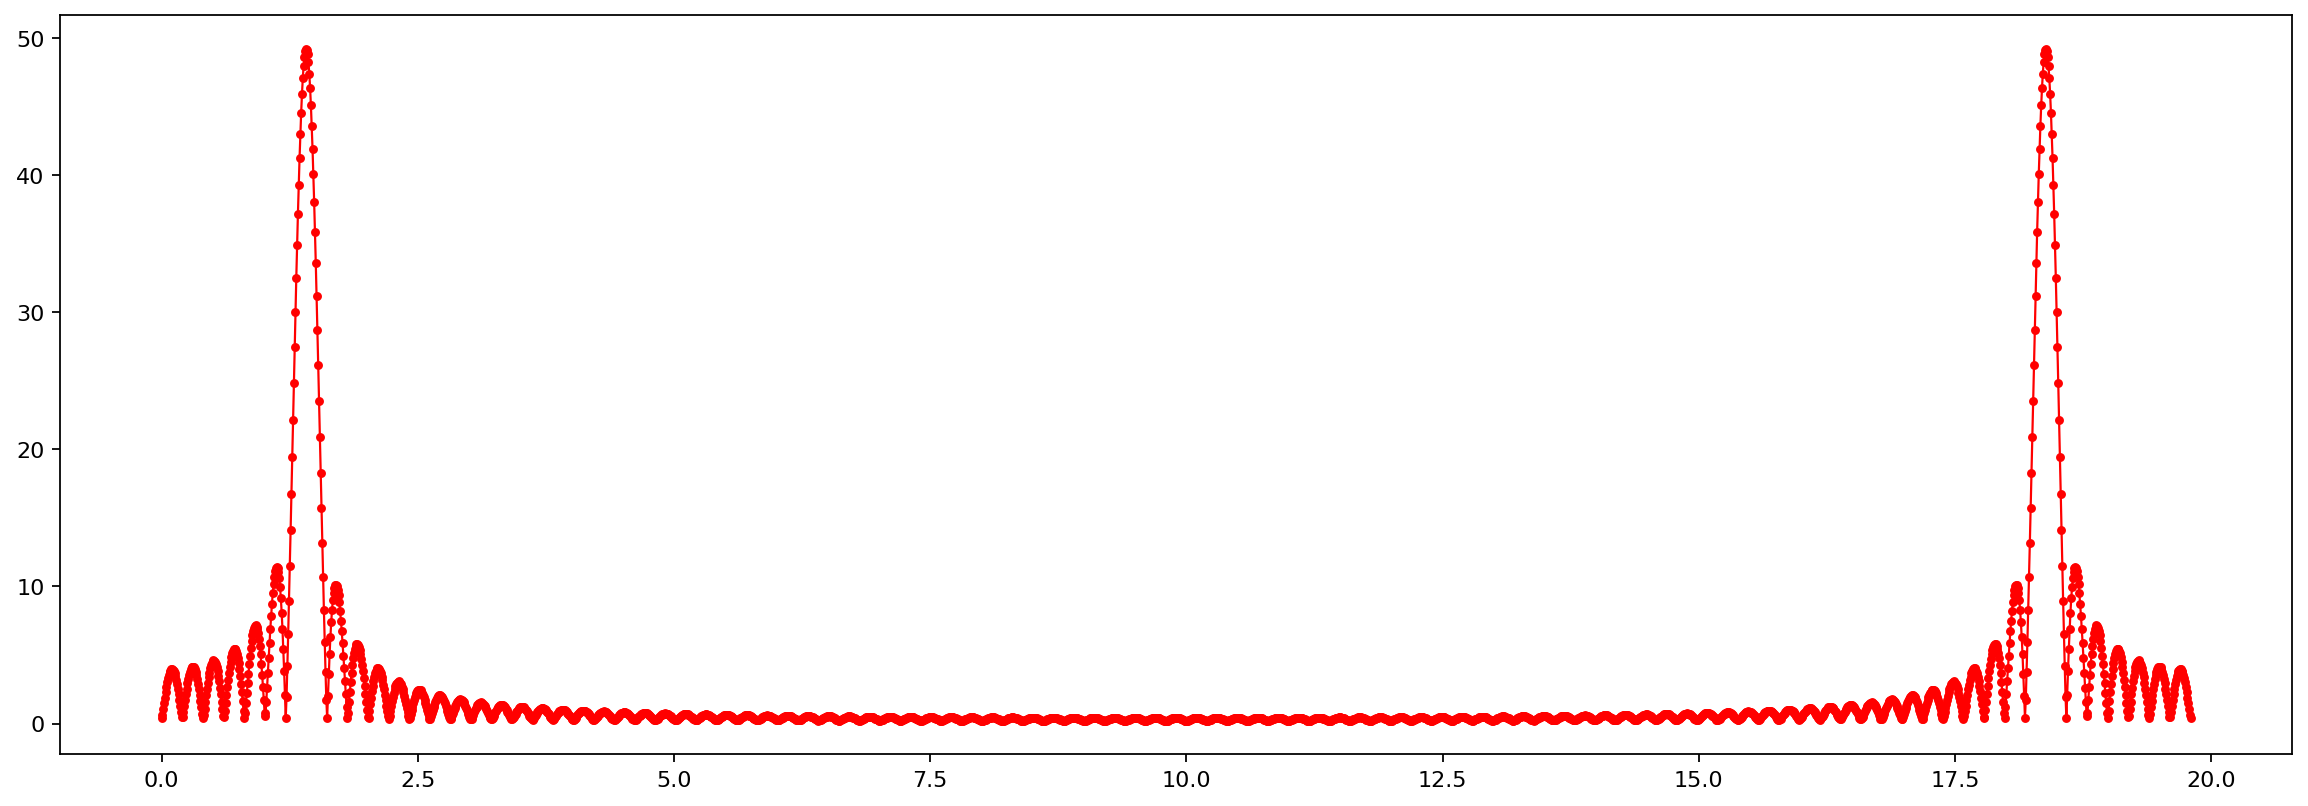

In [116]:
FrecMue=2500
frec=np.linspace(0,nys,FrecMue)

#Fourier en distintas frecuencias para la función
def Fourier():
    fou=np.zeros(len(frec), dtype=complex)
    for i in range(len(frec)):
        fou[i] = abs(fourierDiscreta(t, f(t), frec[i]))
    return fou
y=Fourier()

#Grafica de Fourier para para el espectro de frecuencias
plt.figure(figsize=(18,6),dpi=160)
plt.plot(frec,y,'.-r',lw=1,label='Model')

Si se agrega ruido a la señal sucede esto

<ipython-input-117-b09d1411d6e6>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t,SeñalRuido(t),'.-r',color='black',lw=1,label='Model')


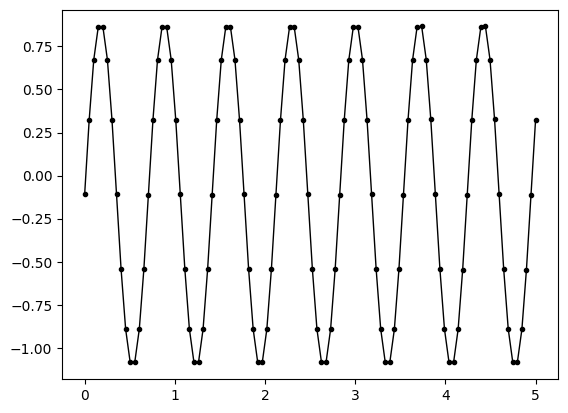

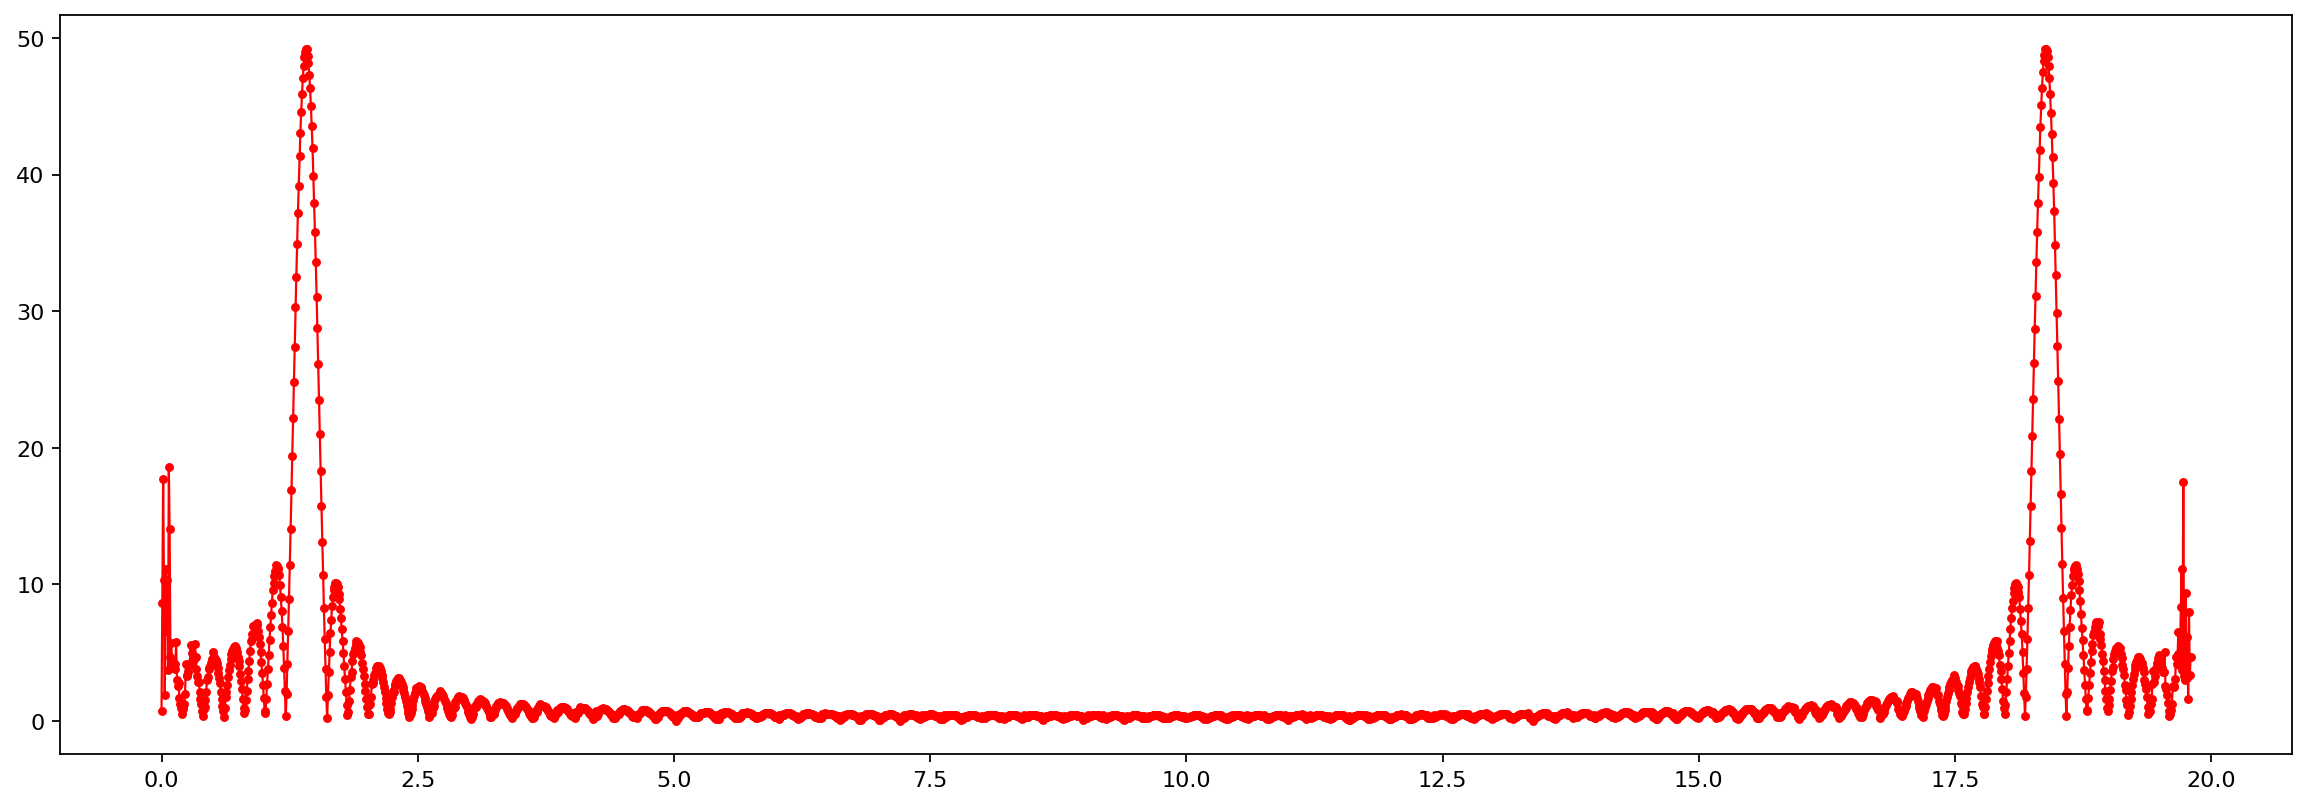

In [117]:
#Señal con ruido
def SeñalRuido(x):
    return(np.sin(2*np.pi*(2**(1/2))*x)+np.random.normal(0.0,0.09))

#Transformada de la señal con ruido
def Fourier():
    fou=np.zeros(len(frec), dtype=complex)
    for i in range(len(frec)):
        fou[i] = abs(fourierDiscreta(t, SeñalRuido(t), frec[i]))
    return fou

y_ruido=Fourier()

#Grafica de la funcion y la Transformada de Fourier
plt.plot(t,SeñalRuido(t),'.-r',color='black',lw=1,label='Model')

plt.figure(figsize=(18,6),dpi=160)
plt.plot(frec,y_ruido,'.-r',lw=1,label='Model')

Respondiendo ¿Qué sucede si se le agrega ruido a la señal en $y$?


Lo que ocurre cuando se le agrega ruido a la funcion es hay picos mas pronunciados apate de los dos principales. Al igual que un leve ensanchamiento de los picos con el cambio del ruido.

**Punto 3**

Encontrando el pico principal de la norma de la transformada, y estimando el ancho a media altura (FWHM).

In [118]:
# Busca picos en la tranformada de fourier
peaks, properties = sig.find_peaks(y_ruido, 40)

# Identifica el pico principal y la altura media
if len(peaks) > 0:
    main_peak_index = np.argmax(properties["peak_heights"])
    main_peak = peaks[main_peak_index]
    medium_height = y_ruido[main_peak] / 2


    DivisioFrec=int(FrecMue/2)
    indices = np.where(y_ruido[:DivisioFrec] > medium_height)
    PuntoIz = indices[0]
    PuntoDe = indices[-1]
    ancho = np.ptp([frec[PuntoIz], frec[PuntoDe]])


    print(f"Punto mas alto en la posicion: {main_peak}. Con aun altura de {y_ruido[main_peak]}.")
    print(f"Altuara media : {medium_height}")
    print(f"Ancho medio del pico: {ancho}")

else:
    print("No se encontro")


Punto mas alto en la posicion: 2321. Con aun altura de (49.219345037847134+0j).
Altuara media : (24.609672518923567+0j)
Ancho medio del pico: 0.2376950780312126


**Respondiendo**

Cambie sólo el número de muestras 𝑁.¿Cambia la posición del pico o su ancho? ¿Por qué?

<ipython-input-119-bdbc25c0c943>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t,SeñalRuido(t),'.-r',color='black',lw=1,label='Model')


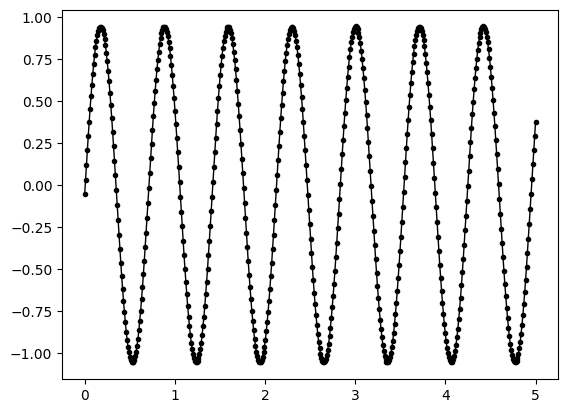

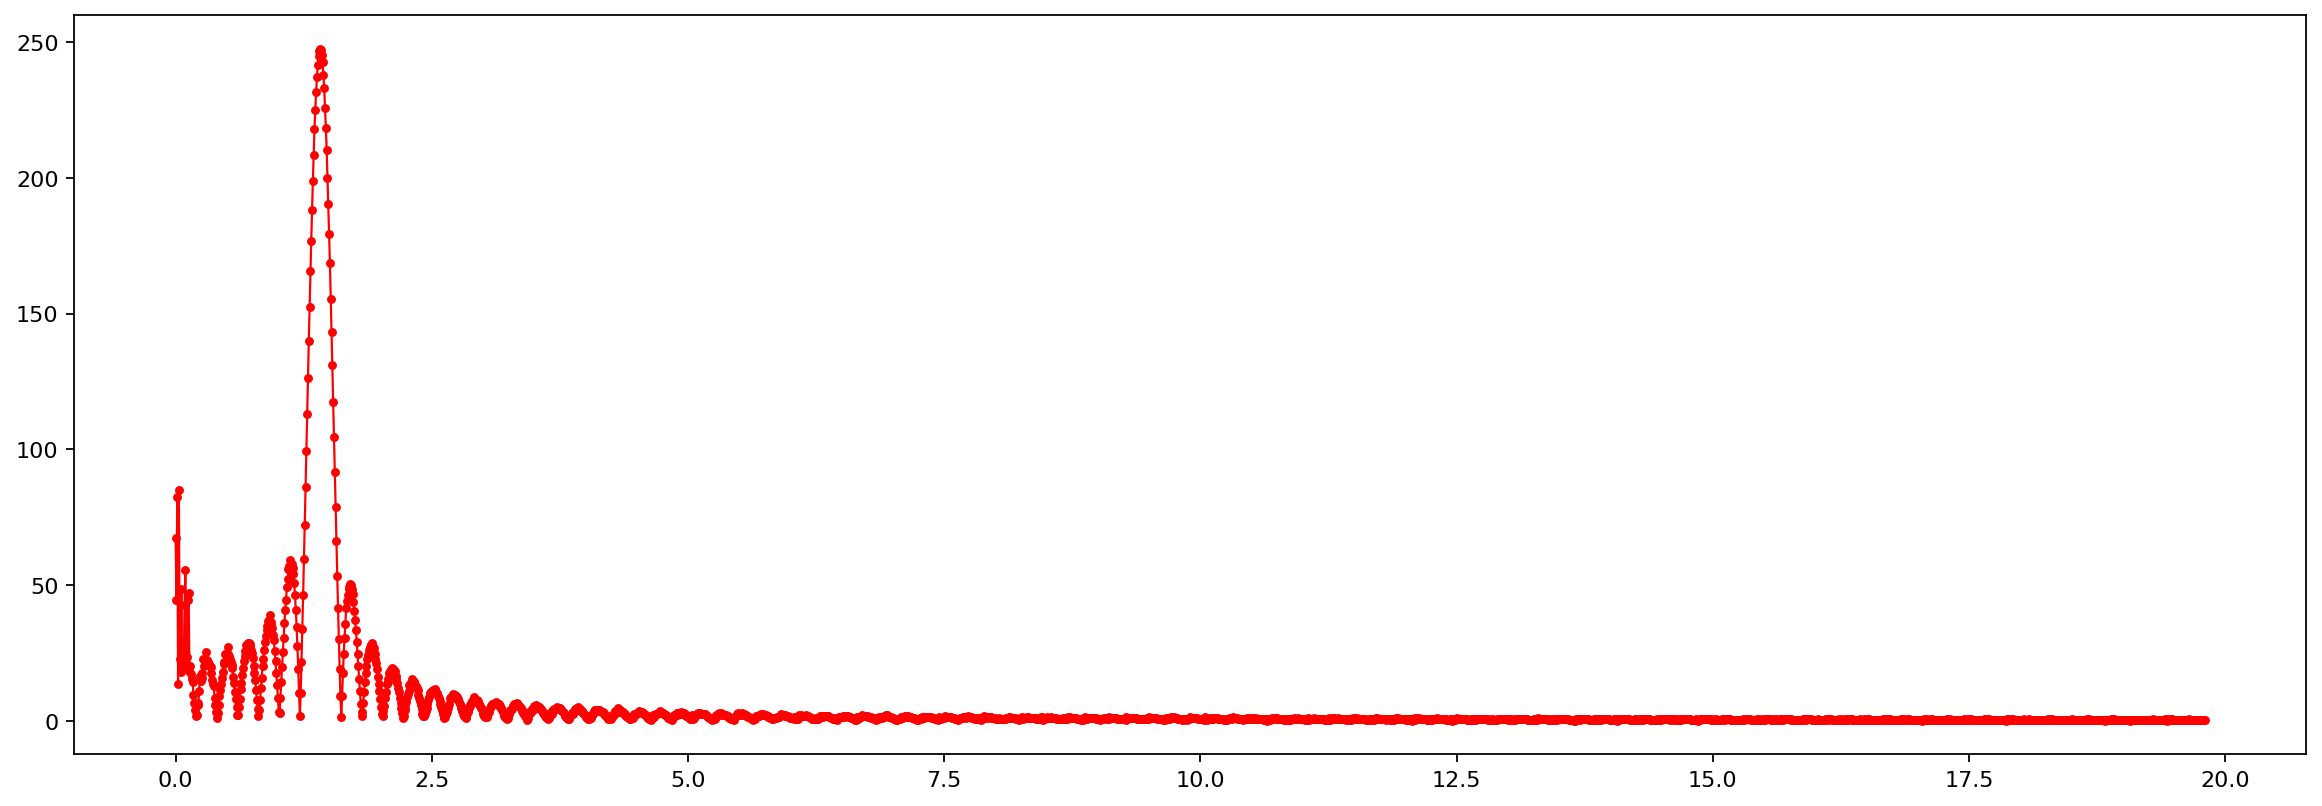

In [119]:
#Cambiando el numero de muestras de 100 a 500
t=np.linspace(0,5,500)

#Señal con ruido
def SeñalRuido(x):
    return(np.sin(2*np.pi*(2**(1/2))*x)+np.random.normal(0.0,0.09))

#Transformada de la señal con ruido
def Fourier():
    fou=np.zeros(len(frec), dtype=complex)
    for i in range(len(frec)):
        fou[i] = abs(fourierDiscreta(t, SeñalRuido(t), frec[i]))
    return fou

y_ruido=Fourier()

#Grafica de la funcion y la Transformada de Fourier
plt.plot(t,SeñalRuido(t),'.-r',color='black',lw=1,label='Model')


plt.figure(figsize=(18,6),dpi=160)
plt.plot(frec,y_ruido,'.-r',lw=1,label='Model')

No combia el ancho del pico, pero si la posicion del pico de frecuencias altas. Esto pues, al haber un mayor numero de puntos de muestreo para que exista una segunda frecuencia que coincida, esta debe ser mucho mayor a la frecuencia de anterior.

**Respondiendo**

Cambie sólo el rango de tiempo $t_{max}$ ¿Cambia la posición del pico o su ancho? ¿Por qué?

<ipython-input-120-ec57eb234c86>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t,SeñalRuido(t),'.-r',color='black',lw=1,label='Model')


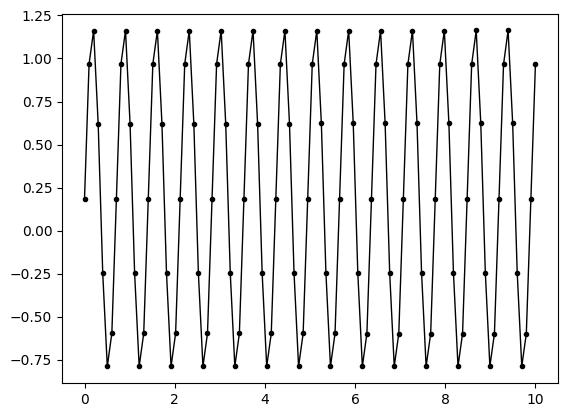

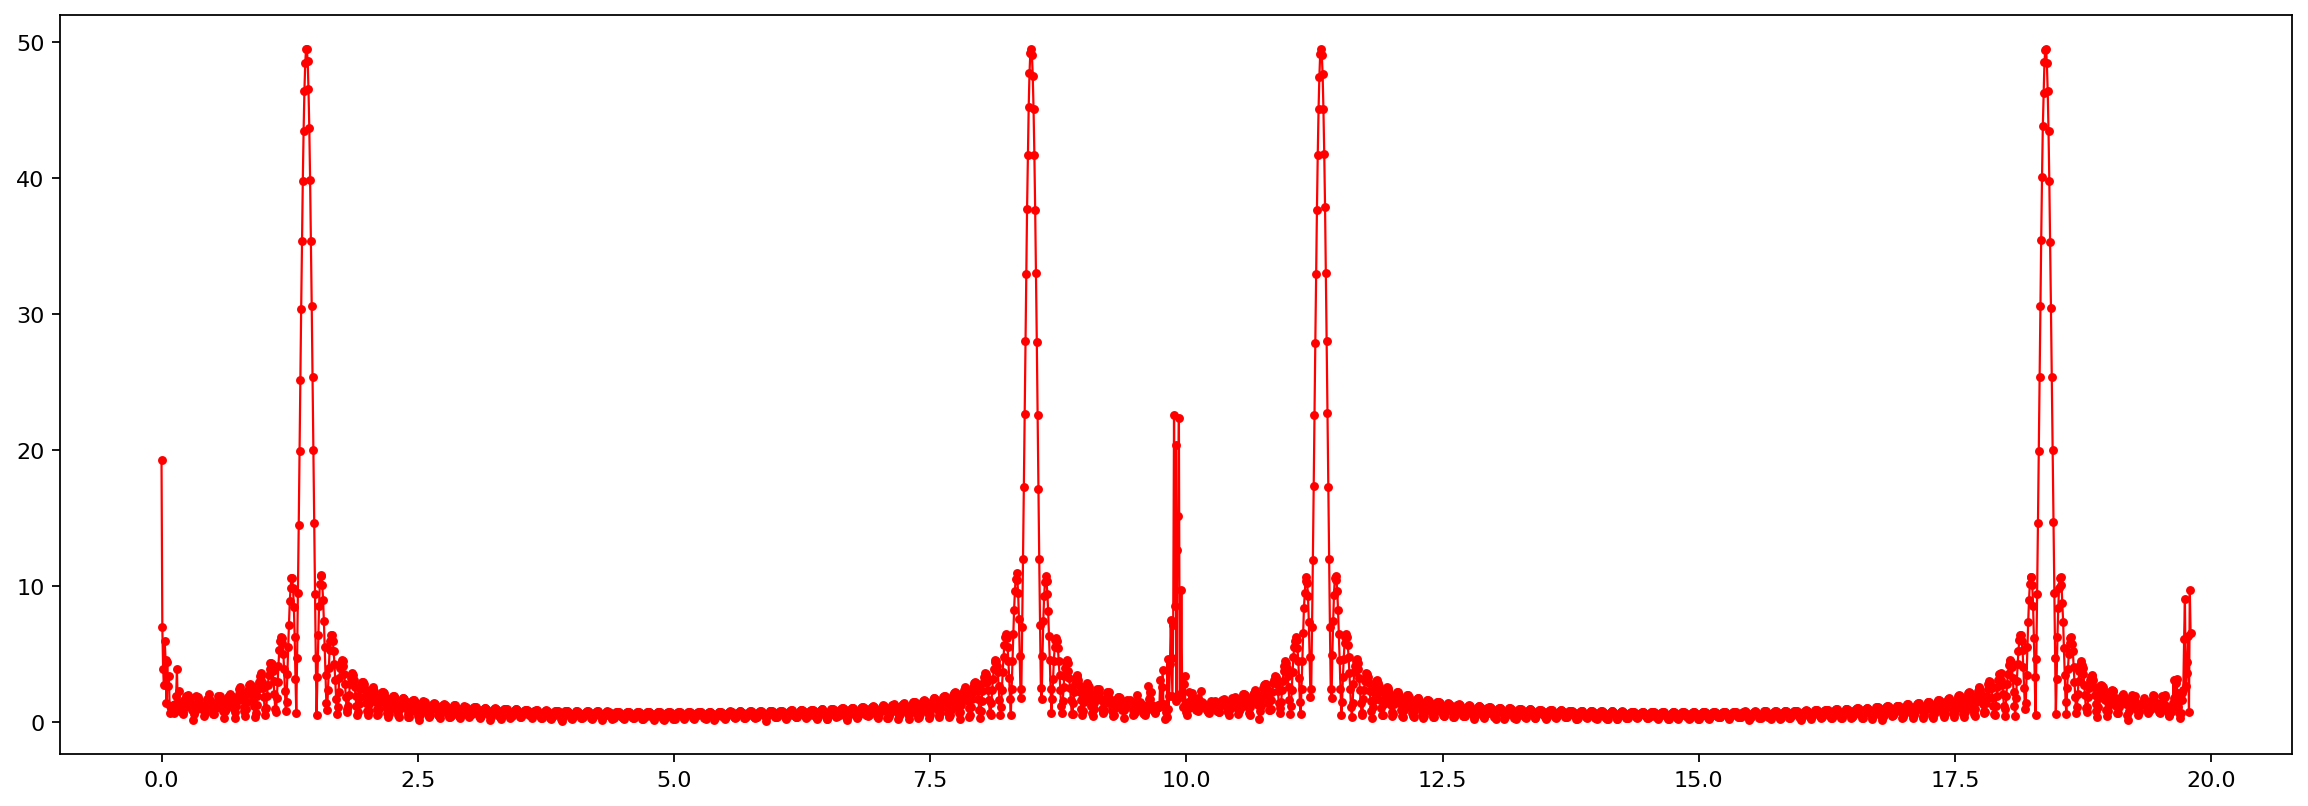

In [120]:
#Cambiando el rango de tiempo de 5 a 10
t=np.linspace(0,10,100)

#Señal con ruido
def SeñalRuido(x):
    return(np.sin(2*np.pi*(2**(1/2))*x)+np.random.normal(0.0,0.09))

#Transformada de la señal con ruido
def Fourier():
    fou=np.zeros(len(frec), dtype=complex)
    for i in range(len(frec)):
        fou[i] = abs(fourierDiscreta(t, SeñalRuido(t), frec[i]))
    return fou

y_ruido=Fourier()

#Grafica de la funcion y la Transformada de Fourier
plt.plot(t,SeñalRuido(t),'.-r',color='black',lw=1,label='Model')


plt.figure(figsize=(18,6),dpi=160)
plt.plot(frec,y_ruido,'.-r',lw=1,label='Model')

En el caso de cambiar el intervalo de tiempo unicamente, cambian tanto la posicion del pico alto de frecuencias, como el ancho del pico. Esto se debe principalmente al hecho de que al haber un mayor rango de timepo pero igual muestreo, se excede el limite de nyquist, esto genera una reflexion de la señal. Ademas de que el ancho del pico es mas estrecho, pues estás extendiendo la señal en el tiempo, lo que reduce la dispersión de la energía en el dominio de la frecuencia, haciendo que los picos en la transformada de Fourier sean más estrechos.

**Punto 4**

Agregando ruido a la variable $t$, y Creando una señal de prueba con una frecuencia mucho mayor a la frecuencia de muestreo.

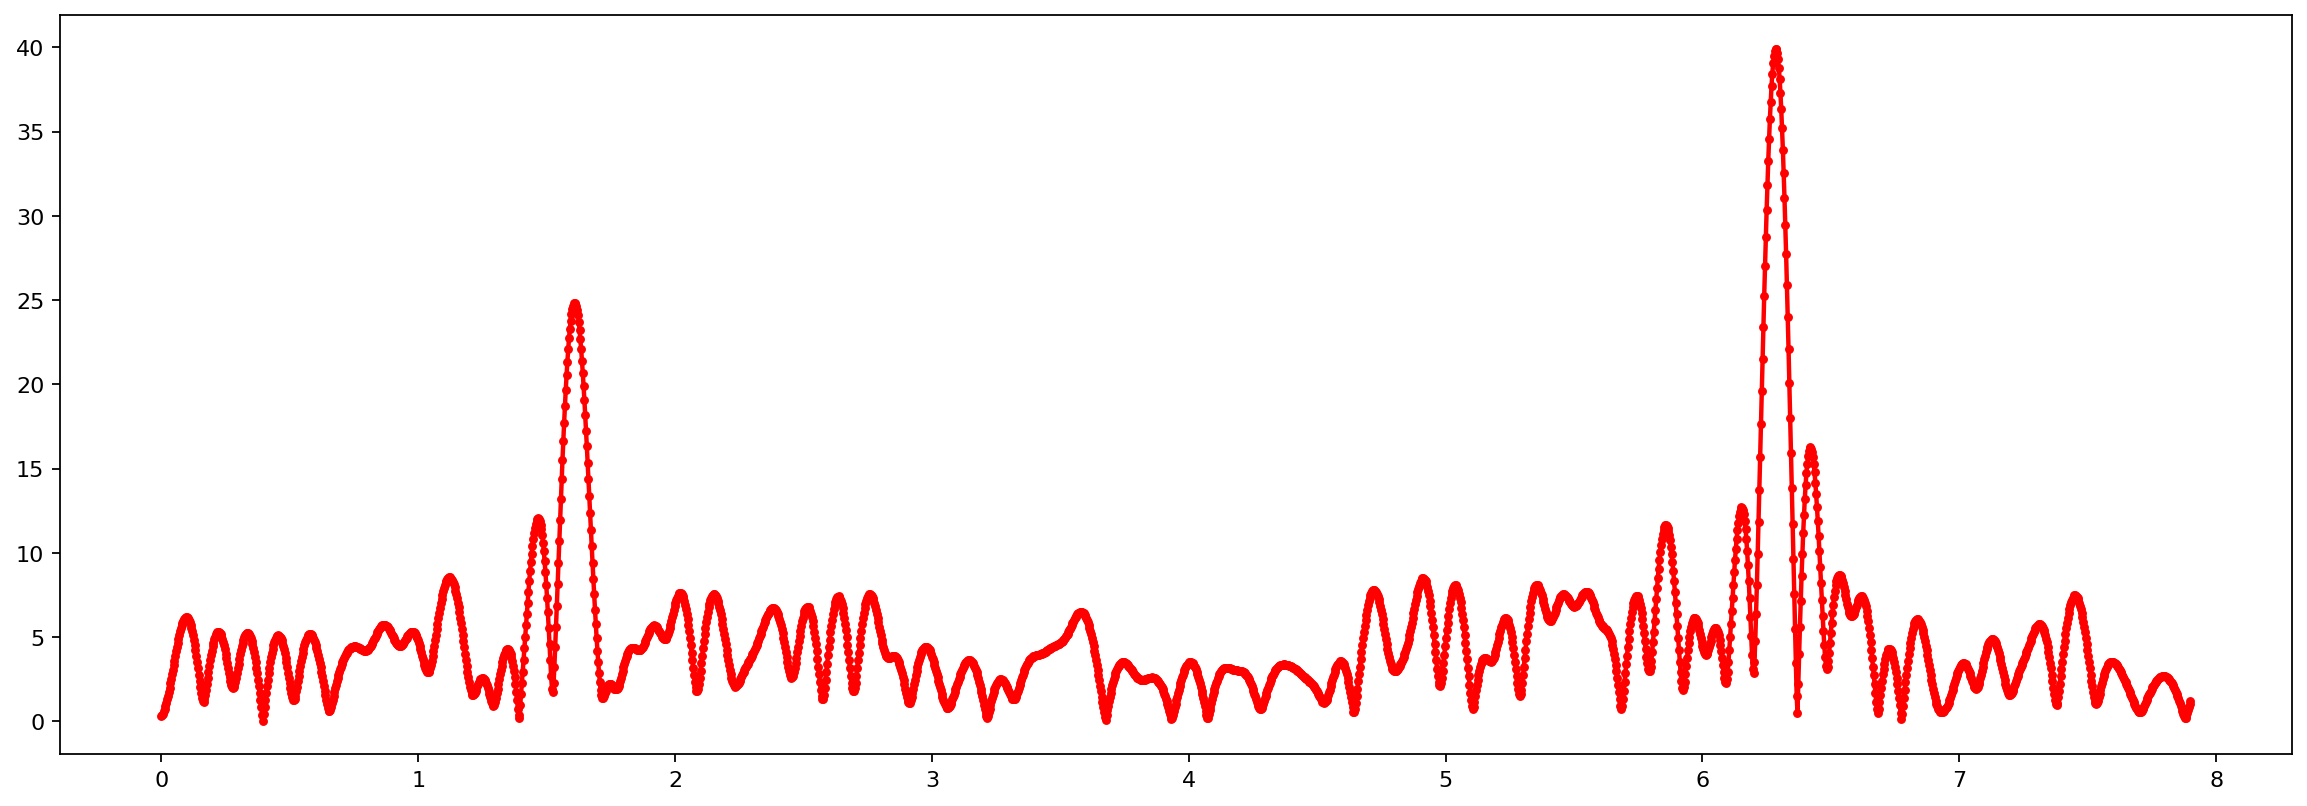

In [122]:
#Muestreo con ruido en el tiempo
N = 80
ts_0 = np.linspace(0,10,N)
ts = ts_0 + np.random.normal(0.,0.02,N)
fun = 2*np.pi
ys = np.sin(2*np.pi*ts*fun)

nys2= 1/(ts_0[1]-ts_0[0])



#Fourier en distintas frecuencias para la función
f_2=np.linspace(0,nys2,2500)
def Fourier2():
    fou=np.zeros(len(f_2), dtype=complex)
    for i in range(len(f_2)):
        fou[i] = abs(fourierDiscreta(ts, ys, f_2[i]))
    return fou

y2=Fourier2()

plt.figure(figsize=(18,6),dpi=160)
plt.plot(f_2,y2,'.-r',lw=2,label='Model')


**Respondiendo**

 Evalúe la transformada hasta varias veces la frecuencia de Nyquist. ¿Es posible recuperar la frecuencia original? ¿Por qué?

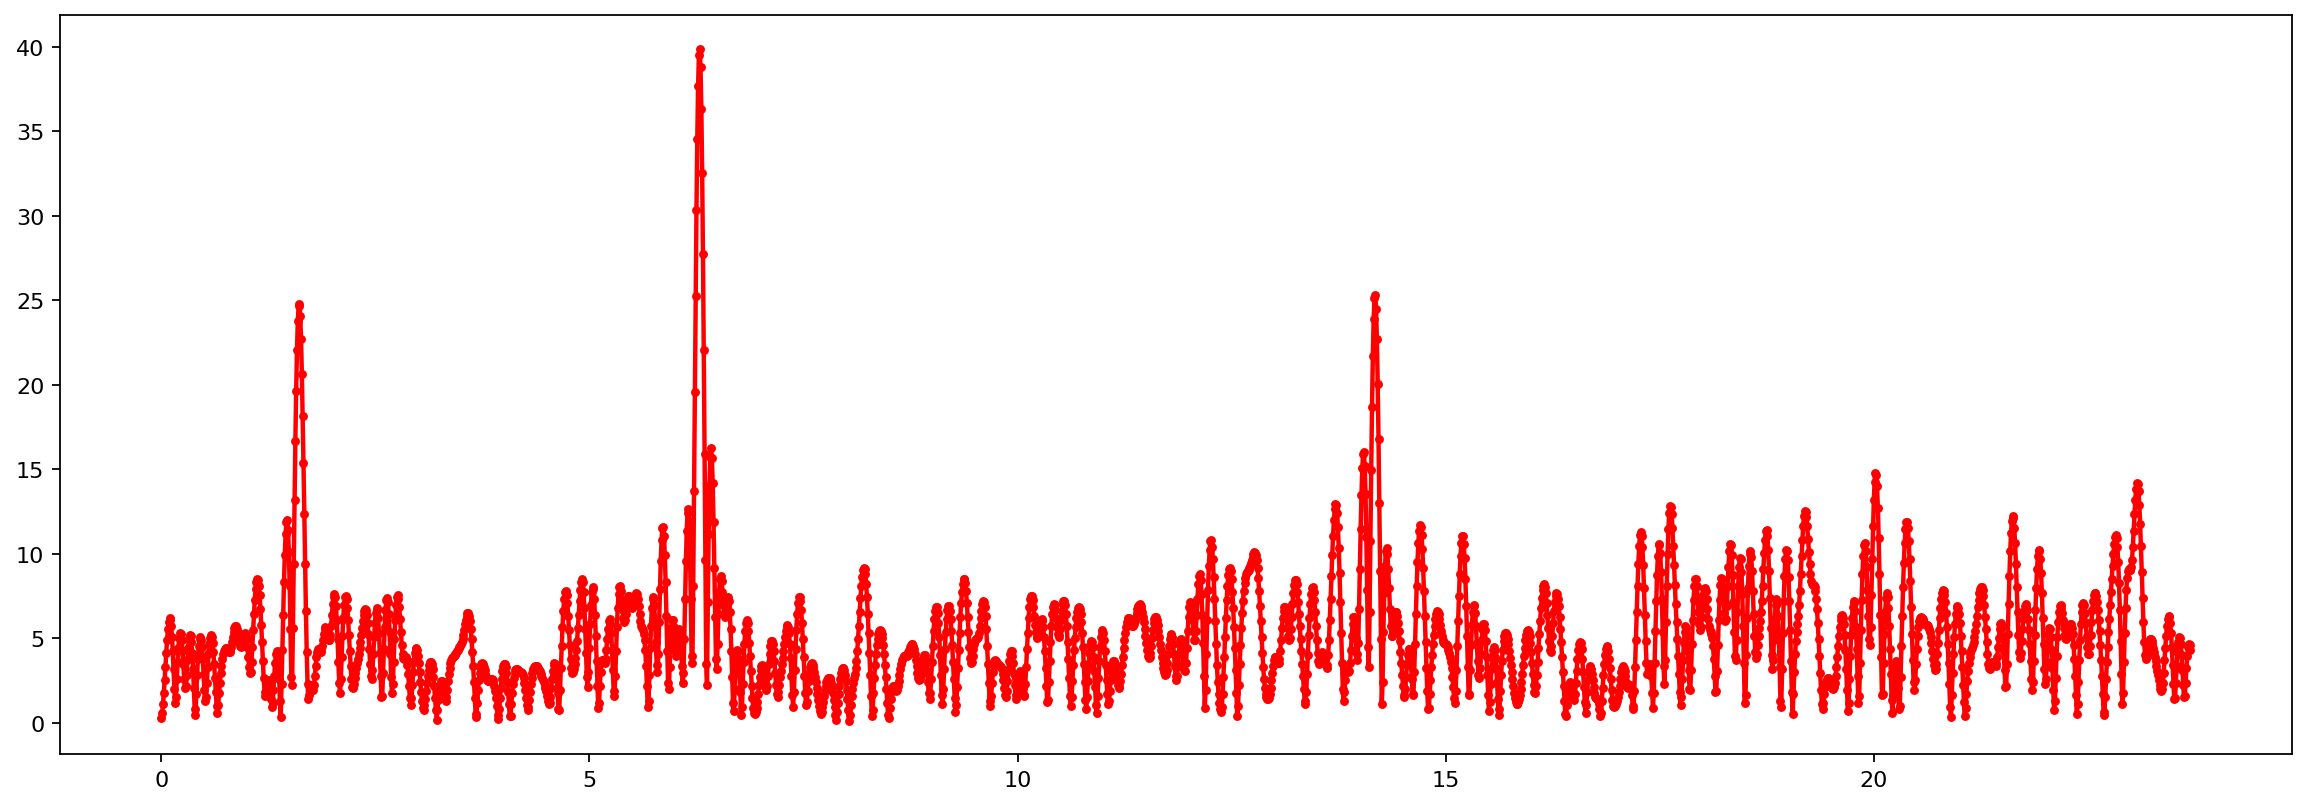

In [124]:
#Evaluando la transformada hasta tres veces la frecuencia de Nyquist
f_2=np.linspace(0,3*nys2,2500)
def Fourier2():
    fou=np.zeros(len(f_2), dtype=complex)
    for i in range(len(f_2)):
        fou[i] = abs(fourierDiscreta(ts, ys, f_2[i]))
    return fou

y2=Fourier2()

plt.figure(figsize=(18,6),dpi=160)
plt.plot(f_2,y2,'.-r',lw=2,label='Model')

Si se agrega ruido en el tiempo, si es posible recuperar la frecuencia original, esto pues al aumentar este ruido ipulsamos que el pico de frecuencia principal se decante po uno o por otro, como en este caso siendo el de la frecuencia alta.